In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# Pemanggilan data
data = pd.read_csv("dataset_edit.csv")

In [ ]:
# Menampilkan 5 data awal
data.head()

id_umkm             nama_usaha  jenis_usaha tenaga_kerja_perempuan  \
0  28828567     UD. Alif Pamungkas    Kesehatan                      1   
1  28828568      UD. Zidanar Panji  Perdagangan                      5   
2  28828569  UD. Winda Jayengprana      unknown                     74   
3  28828570     UD. Damaris Satria         Jasa                     89   
4  28828571     UD. Qasya Wiratama         Jasa                     91   

  tenaga_kerja_laki_laki     aset     omset      marketplace  \
0                     56  5497149   3347794        Tokopedia   
1                     44  7398384  39969661        Bukalapak   
2                     51  8881762  25253355  Website Sendiri   
3                      5  9576178  20700389  Website Sendiri   
4                     59  9456853   4820810           Lazada   

  kapasitas_produksi status_legalitas tahun_berdiri      laba biaya_karyawan  \
0                479  Belum Terdaftar          2015  -2149355      171000000   
1                464        Terdaftar          2014  32571277      147000000   
2                383  Belum Terdaftar          2000  16371593      375000000   
3                986  Belum Terdaftar          2003  11124211      282000000   
4                314  Belum Terdaftar          2002  -4636043      450000000   

  jumlah_pelanggan  
0              479  
1              464  
2              383  
3              986  
4              314

In [ ]:
# Menampilkan 5 data terakhir
data.tail(5)

id_umkm              nama_usaha jenis_usaha tenaga_kerja_perempuan  \
13559  288222126     UD. Syana Ilir Rian        Jasa                     62   
13560  288222127          UD. Bela Widhi  Pendidikan                     70   
13561  288222128           UD. Bayu Alam   Kesehatan                     50   
13562  288222129  UD. Olla Sudharmo Udin  Pendidikan                     11   
13563  288222130       UD. Qasya Kencana  Pendidikan                     57   

      tenaga_kerja_laki_laki     aset     omset      marketplace  \
13559                     63  6854562  48239150  Website Sendiri   
13560                     50   804787  35210634  Website Sendiri   
13561                     37  8211715   8874364           Lazada   
13562                    NaN  6217989  41510653  Website Sendiri   
13563                    NaN  4523299  49813771           Shopee   

      kapasitas_produksi status_legalitas tahun_berdiri      laba  \
13559                162  Belum Terdaftar          2003  41384588   
13560                180        Terdaftar          2012  34405847   
13561                802        Terdaftar          2009    662649   
13562                122  Belum Terdaftar          2009  35292664   
13563                136        Terdaftar          2002  45290472   

      biaya_karyawan jumlah_pelanggan  
13559      375000000              162  
13560      360000000              180  
13561      261000000              802  
13562      132000000              122  
13563      297000000              136

In [ ]:
# Melihat statistika deskriptif dataset
data.describe()

id_umkm         nama_usaha jenis_usaha tenaga_kerja_perempuan  \
count     13467              13564       13467                  13444   
unique    13439              13564           8                    101   
top     unknown  UD. Qasya Kencana        Jasa                      3   
freq         29                  1        3403                    158   

       tenaga_kerja_laki_laki     aset    omset      marketplace  \
count                   13462    13453    13451            13447   
unique                    101    13410    13422                6   
top                        47  unknown  unknown  Website Sendiri   
freq                      167       31       28             2758   

       kapasitas_produksi status_legalitas tahun_berdiri     laba  \
count               13442            13470         13469    13452   
unique                991                3            26    13406   
top               unknown        Terdaftar          2024  unknown   
freq                   42             6896           565       45   

       biaya_karyawan jumlah_pelanggan  
count           13469            13453  
unique            200              991  
top         312000000          unknown  
freq              150               41

# Deteksi data duplikat

In [ ]:
# Memeriksa jumlah baris duplikat
jumlah_duplikat = data.duplicated().sum()

In [ ]:
# Menampilkan jumlah baris duplikat
print(f"Jumlah baris duplikat dalam dataset yaitu {jumlah_duplikat}.")

Jumlah baris duplikat dalam dataset yaitu 0.


# Deteksi *missing value* dan penanganan *missing value*

In [ ]:
# Melihat info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_umkm                 13467 non-null  object
 1   nama_usaha              13564 non-null  object
 2   jenis_usaha             13467 non-null  object
 3   tenaga_kerja_perempuan  13444 non-null  object
 4   tenaga_kerja_laki_laki  13462 non-null  object
 5   aset                    13453 non-null  object
 6   omset                   13451 non-null  object
 7   marketplace             13447 non-null  object
 8   kapasitas_produksi      13442 non-null  object
 9   status_legalitas        13470 non-null  object
 10  tahun_berdiri           13469 non-null  object
 11  laba                    13452 non-null  object
 12  biaya_karyawan          13469 non-null  object
 13  jumlah_pelanggan        13453 non-null  object
dtypes: object(14)
memory usage: 1.4+ MB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total 14 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak 13564 baris. Akan tetapi terdapat beberapa kolom yang memiliki jumlah baris < 13564, maka akan dilakukan proses identifikasi lebih lanjut.

In [ ]:
# Melihat missing value pada dataset
data.isnull()

id_umkm  nama_usaha  jenis_usaha  tenaga_kerja_perempuan  \
0        False       False        False                   False   
1        False       False        False                   False   
2        False       False        False                   False   
3        False       False        False                   False   
4        False       False        False                   False   
...        ...         ...          ...                     ...   
13559    False       False        False                   False   
13560    False       False        False                   False   
13561    False       False        False                   False   
13562    False       False        False                   False   
13563    False       False        False                   False   

       tenaga_kerja_laki_laki   aset  omset  marketplace  kapasitas_produksi  \
0                       False  False  False        False               False   
1                       False  False  False        False               False   
2                       False  False  False        False               False   
3                       False  False  False        False               False   
4                       False  False  False        False               False   
...                       ...    ...    ...          ...                 ...   
13559                   False  False  False        False               False   
13560                   False  False  False        False               False   
13561                   False  False  False        False               False   
13562                    True  False  False        False               False   
13563                    True  False  False        False               False   

       status_legalitas  tahun_berdiri   laba  biaya_karyawan  \
0                 False          False  False           False   
1                 False          False  False           False   
2                 False          False  False           False   
3                 False          False  False           False   
4                 False          False  False           False   
...                 ...            ...    ...             ...   
13559             False          False  False           False   
13560             False          False  False           False   
13561             False          False  False           False   
13562             False          False  False           False   
13563             False          False  False           False   

       jumlah_pelanggan  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  
...                 ...  
13559             False  
13560             False  
13561             False  
13562             False  
13563             False  

[13564 rows x 14 columns]

In [ ]:
# Melihat jumlah missing value pada setiap kolom dataset
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


id_umkm                    97
nama_usaha                  0
jenis_usaha                97
tenaga_kerja_perempuan    120
tenaga_kerja_laki_laki    102
aset                      111
omset                     113
marketplace               117
kapasitas_produksi        122
status_legalitas           94
tahun_berdiri              95
laba                      112
biaya_karyawan             95
jumlah_pelanggan          111
dtype: int64

Berdasarkan output di atas, diperoleh bahwa hampir semua kolom  mengandung *missing values* (blanks/ N/A (Python : nan atau NaN)), diantaranya yaitu:
1. kolom id_umkm sebanyak 97 *missing value*,
2. kolom jenis_usaha sebanyak 97 *missing value*,
3. kolom tenaga_kerja_perempuan sebanyak 120 *missing value*,
4. kolom tenaga_kerja_laki_laki sebanyak	102 *missing value*,
5. kolom aset	sebanyak 111 *missing value*,
6. kolom omset	sebanyak 113 *missing value*,
7. kolom marketplace sebanyak	117 *missing value*,
8. kolom kapasitas_produksi sebanyak	122 *missing
value*,
9. kolom status_legalitas sebanyak	94 *missing value*,
10. kolom tahun_berdiri sebanyak	95 *missing value*,
11. kolom laba sebanyak	112 *missing value*,
12. kolom biaya_karyawan	sebanyak 95 *missing value*, dan
13. kolom jumlah_pelanggan sebanyak 111 *missing value*.

In [ ]:
# Mengetahui jumlah missing value di seluruh dataset
print(f"Jumlah missing value dalam dataset yaitu {data.isnull().sum().sum()} missing value.")

Jumlah missing value dalam dataset yaitu 1386 missing value.


Dari output tersebut dapat dilihat bahwa jumlah total missing value pada dataset tersebut yaitu 1386 missing value.

Dalam *machine learning*, *missing values* adalah masalah umum yang harus ditangani sebelum model dapat digunakan. Ada beberapa metode untuk menangani *missing values*, tergantung pada jenis data dan karakteristik distribusinya.

1. Handling missing value pada kolom id_umkm

In [ ]:
# Melihat isi dalam kolom id_umkm
data['id_umkm'].unique()

array(['28828567', '28828568', '28828569', ..., '288222128', '288222129',
       '288222130'], dtype=object)

In [ ]:
# Jumlah missing value pada kolom id_umkm
print(f"Jumlah missing value pada kolom id_umkm yaitu {np.sum(data['id_umkm'].isnull())} missing value.")

Jumlah missing value pada kolom id_umkm yaitu 97 missing value.


In [ ]:
#  Mengisi missing value pada kolom id_umkm dengan nomor urut

# Mentukan nomor awal untuk pengisian ID yang missing
start_number_basis = 28828629

# Identifikasi indeks baris yang memiliki missing value di kolom 'id_umkm'
missing_id_indices = data[data['id_umkm'].isnull()].index

# Siapkan list untuk menampung ID baru yang akan dihasilkan
new_ids = []

# Loop melalui indeks baris yang missing dan hasilkan ID baru
for i, idx in enumerate(missing_id_indices):
    # Hasil ID baru adalah start_number_basis + urutan (dimulai dari 1)
    generated_id = start_number_basis + i + 1
    # Pastikan ID baru ini dalam bentuk string agar konsisten
    new_ids.append(str(generated_id))

# Gunakan .loc untuk mengisi missing values pada indeks yang spesifik dengan list ID baru yang sudah dibuat
data.loc[missing_id_indices, 'id_umkm'] = new_ids

# Verifikasi jumlah missing value pada kolom id_umkm setelah diisi
print(f"Jumlah missing value pada kolom id_umkm setelah diisi dengan nomor urut: {np.sum(data['id_umkm'].isnull())}")

# Tampilkan beberapa baris yang ID-nya baru diisi untuk verifikasi
print(data.loc[missing_id_indices].head())

Jumlah missing value pada kolom id_umkm setelah diisi dengan nomor urut: 0
      id_umkm           nama_usaha        jenis_usaha tenaga_kerja_perempuan  \
63   28828630   UD. Ucup Tirtayasa  Makanan & Minuman                     66   
102  28828631       UD. Pasha Atma  Makanan & Minuman                     29   
135  28828632   UD. Fikri Saprahan          Kesehatan                     81   
167  28828633  UD. Jasmine Saputra         Pendidikan                     36   
431  28828634  UD. Fajar Nirwasita          Kesehatan                      4   

    tenaga_kerja_laki_laki     aset     omset      marketplace  \
63                      50  9754163  40253559        Tokopedia   
102                     87  6198421  14974366        Tokopedia   
135                     22  6471002  48263438        Tokopedia   
167                     19  6310803  30142721  Website Sendiri   
431                     18  5687081  24136771  Website Sendiri   

    kapasitas_produksi status_legalitas tahun_b

2. Handling missing value pada kolom kolom jenis_usaha

In [ ]:
# Melihat isi dalam kolom jenis_usaha
data['jenis_usaha'].unique()

array(['Kesehatan', 'Perdagangan', 'unknown', 'Jasa', 'Pendidikan', nan,
       'Fashion', 'Makanan & Minuman', 'Perusahaan'], dtype=object)

In [ ]:
# Jumlah missing value pada kolom jenis_usaha
print(f"Jumlah missing value pada kolom jenis_usaha yaitu {np.sum(data['jenis_usaha'].isnull())} missing value.")

Jumlah missing value pada kolom jenis_usaha yaitu 97 missing value.


In [ ]:
# Mengisi missing value pada kolom jenis_usaha
data['jenis_usaha'] = data['jenis_usaha'].fillna(data['jenis_usaha'].mode()[0])

In [ ]:
# Melihat jumlah missing value pada kolom jenis_usaha setelah dilakukan pengisian missing value
print(f"Jumlah missing value setelah dilakukan pengisian missing value pada kolom jenis_usaha yaitu {np.sum(data['jenis_usaha'].isnull())} missing value.")

Jumlah missing value setelah dilakukan pengisian missing value pada kolom jenis_usaha yaitu 0 missing value.


3. Handling missing value pada kolom kolom tenaga_kerja_perempuan

In [ ]:
# Melihat isi dalam kolom tenaga_kerja_perempuan
data['tenaga_kerja_perempuan'].unique()

array(['1', '5', '74', '89', '91', '76', '37', '75', '82', '17', '18',
       '27', '11', '95', '51', '86', '99', '57', '93', '21', '44', '61',
       '41', '66', '8', '63', '14', '29', '25', '68', '94', '53', '78',
       '52', '98', '33', '81', '13', '87', '12', '55', '71', '65', '62',
       '90', '28', '22', '35', '84', '6', '31', '15', '9', '58', '79',
       '0', '69', '96', '4', '80', '24', '34', '38', '45', '36', '59',
       '30', '32', '83', '85', '60', '70', '77', '19', '56', '88', '48',
       '97', '67', '64', '39', '23', '2', '16', '43', '3', '46', nan,
       '92', '47', '20', '26', '40', '50', '49', 'unknown', '54', '73',
       '42', '10', '7', '72'], dtype=object)

In [ ]:
# Jumlah missing value pada kolom tenaga_kerja_perempuan
print(f"Jumlah missing value pada kolom tenaga_kerja_perempuan yaitu {np.sum(data['tenaga_kerja_perempuan'].isnull())} missing value.")

Jumlah missing value pada kolom tenaga_kerja_perempuan yaitu 120 missing value.


In [ ]:
# Mengisi missing value pada kolom tenaga_kerja_perempuan
data['tenaga_kerja_perempuan'] = pd.to_numeric(data['tenaga_kerja_perempuan'], errors='coerce')
data['tenaga_kerja_perempuan']=data['tenaga_kerja_perempuan'].fillna(data['tenaga_kerja_perempuan'].mean())

In [ ]:
# Melihat jumlah missing value pada kolom tenaga_kerja_perempuan setelah dilakukan pengisian missing value
print(f"Jumlah missing value setelah dilakukan pengisian missing value pada kolom tenaga_kerja_perempuan yaitu {np.sum(data['tenaga_kerja_perempuan'].isnull())} missing value.")

Jumlah missing value setelah dilakukan pengisian missing value pada kolom tenaga_kerja_perempuan yaitu 0 missing value.


4. Handling missing value pada kolom tenaga_kerja_laki_laki

In [ ]:
# Melihat isi dalam kolom tenaga_kerja_laki_laki
data['tenaga_kerja_laki_laki'].unique()

array(['56', '44', '51', '5', '59', '36', '53', '3', '82', '46', '84',
       '81', '41', '47', '99', '60', '61', '54', nan, '14', '58', '62',
       '65', '30', '18', '37', '78', '32', '89', '52', '29', '74', '64',
       '13', '9', '16', '75', '2', '21', '55', '25', '49', '86', '79',
       '63', '57', '12', '71', '23', '68', '6', '50', '26', '11', '40',
       '88', '10', '35', '15', '7', '98', '8', '20', '17', '4', '66',
       '70', '31', '94', '77', '87', '1', '34', '97', '93', '48', '22',
       '67', '90', '76', '38', '39', '80', '28', '85', '19', '95', '92',
       '33', '24', '73', 'unknown', '0', '42', '69', '91', '72', '83',
       '43', '27', '96', '45'], dtype=object)

In [ ]:
# Melihat jumlah missing value pada kolom tenaga_kerja_laki_laki
print(f"Jumlah missing value pada kolom tenaga_kerja_laki_laki yaitu {np.sum(data['tenaga_kerja_laki_laki'].isnull())} missing value.")

Jumlah missing value pada kolom tenaga_kerja_laki_laki yaitu 102 missing value.


In [ ]:
# Mengisi missing value pada kolom tenaga_kerja_laki_laki
data['tenaga_kerja_laki_laki'] = pd.to_numeric(data['tenaga_kerja_laki_laki'], errors='coerce')
data['tenaga_kerja_laki_laki']=data['tenaga_kerja_laki_laki'].fillna(data['tenaga_kerja_laki_laki'].mean())

In [ ]:
# Melihat jumlah missing value pada kolom tenaga_kerja_laki_laki setelah dilakukan pengisian missing value
print(f"Jumlah missing value setelah dilakukan pengisian missing value pada kolom tenaga_kerja_laki_laki yaitu {np.sum(data['tenaga_kerja_laki_laki'].isnull())} missing value.")

Jumlah missing value setelah dilakukan pengisian missing value pada kolom tenaga_kerja_laki_laki yaitu 0 missing value.


5. Handling missing value pada kolom aset

In [ ]:
# Melihat isi dalam kolom aset
data['aset'].unique()

array(['5497149', '7398384', '8881762', ..., '8211715', '6217989',
       '4523299'], dtype=object)

In [ ]:
# Melihat jumlah missing value pada kolom aset
print(f"Jumlah missing value pada kolom aset yaitu {np.sum(data['aset'].isnull())} missing value.")

Jumlah missing value pada kolom aset yaitu 111 missing value.


In [ ]:
# Mengisi missing value pada kolom aset
data['aset'] = pd.to_numeric(data['aset'], errors='coerce')
data['aset']=data['aset'].fillna(data['aset'].mean())

In [ ]:
# Melihat jumlah missing value pada kolom aset setelah dilakukan pengisian missing value
print(f"Jumlah missing value setelah dilakukan pengisian missing value pada kolom aset yaitu {np.sum(data['aset'].isnull())} missing value.")

Jumlah missing value setelah dilakukan pengisian missing value pada kolom aset yaitu 0 missing value.


6. Handling missing value pada kolom omset

In [ ]:
# Melihat isi dalam kolom omset
data['omset'].unique()

array(['3347794', '39969661', '25253355', ..., '8874364', '41510653',
       '49813771'], dtype=object)

In [ ]:
# Melihat jumlah missing value pada kolom omset
print(f"Jumlah missing value pada kolom omset yaitu {np.sum(data['omset'].isnull())} missing value.")

Jumlah missing value pada kolom omset yaitu 113 missing value.


In [ ]:
# Mengisi missing value pada kolom omset
data['omset'] = pd.to_numeric(data['omset'], errors='coerce')
data['omset']=data['omset'].fillna(data['omset'].mean())

In [ ]:
# Melihat jumlah missing value pada kolom omset setelah dilakukan pengisian missing value
print(f"Jumlah missing value setelah dilakukan pengisian missing value pada kolom omset yaitu {np.sum(data['omset'].isnull())} missing value.")

Jumlah missing value setelah dilakukan pengisian missing value pada kolom omset yaitu 0 missing value.


7. Handling missing value pada kolom marketplace


In [ ]:
# Melihat isi dalam kolom marketplace
data['marketplace'].unique()

array(['Tokopedia', 'Bukalapak', 'Website Sendiri', 'Lazada', 'Shopee',
       nan, 'unknown'], dtype=object)

In [ ]:
# Melihat jumlah missing value pada kolom marketplace
print(f"Jumlah missing value pada kolom marketplace yaitu {np.sum(data['marketplace'].isnull())} missing value.")

Jumlah missing value pada kolom marketplace yaitu 117 missing value.


In [ ]:
# Mengisi missing value pada kolom marketplace
data['marketplace'] = data['marketplace'].fillna(data['marketplace'].mode()[0])

In [ ]:
# Melihat jumlah missing value pada kolom marketplace setelah dilakukan pengisian missing value
print(f"Jumlah missing value setelah dilakukan pengisian missing value pada kolom marketplace yaitu {np.sum(data['marketplace'].isnull())} missing value.")

Jumlah missing value setelah dilakukan pengisian missing value pada kolom marketplace yaitu 0 missing value.


8. Handling missing value pada kolom kapasitas_produksi

In [ ]:
# Melihat isi dalam kolom kapasitas_produksi
data['kapasitas_produksi'].unique()

array(['479', '464', '383', '986', '314', '661', '714', '460', '120',
       '871', '736', '580', '593', '26', '143', '581', '321', '542',
       '852', '203', '904', '669', '841', '633', '285', '104', '173',
       '327', '545', '991', '914', '195', '58', '218', '235', '190',
       '788', '399', '964', '956', '186', '608', '505', '122', '768',
       '130', '952', '822', '177', '227', '786', '785', '442', '189',
       '503', '803', '765', '405', '618', '502', '329', '720', '384',
       '857', '675', '98', '385', '556', '628', '358', '443', '243',
       '869', '153', '604', '689', '783', '612', '76', 'unknown', '809',
       '417', '684', '105', '574', '901', '920', '942', '418', '606',
       '983', '416', '64', '16', '270', '860', '977', '589', '15', '878',
       '915', '827', '517', '890', '261', '407', '534', '883', '265',
       '895', '80', '414', nan, '404', '429', '596', '576', '43', '487',
       '722', '848', '951', '814', '965', '923', '570', '102', '350',
       '919',

In [ ]:
# Melihat jumlah missing value pada kolom kapasitas_produksi
print(f"Jumlah missing value pada kolom kapasitas_produksi yaitu {np.sum(data['kapasitas_produksi'].isnull())} missing value.")

Jumlah missing value pada kolom kapasitas_produksi yaitu 122 missing value.


In [ ]:
# Mengisi missing value pada kolom kapasitas_produksi
data['kapasitas_produksi'] = pd.to_numeric(data['kapasitas_produksi'], errors='coerce')
data['kapasitas_produksi']=data['kapasitas_produksi'].fillna(data['kapasitas_produksi'].mean())

In [ ]:
# Melihat jumlah missing value pada kolom kapasitas_produksi setelah dilakukan pengisian missing value
print(f"Jumlah missing value setelah dilakukan pengisian missing value pada kolom kapasitas_produksi yaitu {np.sum(data['kapasitas_produksi'].isnull())} missing value.")

Jumlah missing value setelah dilakukan pengisian missing value pada kolom kapasitas_produksi yaitu 0 missing value.


9. Handling missing value pada kolom status_legalitas

In [ ]:
# Melihat isi dalam kolom status_legalitas
data['status_legalitas'].unique()

array(['Belum Terdaftar', 'Terdaftar', nan, 'unknown'], dtype=object)

In [ ]:
# Melihat jumlah missing value pada kolom status_legalitas
print(f"Jumlah missing value pada kolom status_legalitas yaitu {np.sum(data['status_legalitas'].isnull())} missing value.")

Jumlah missing value pada kolom status_legalitas yaitu 94 missing value.


In [ ]:
# Mengisi missing value pada kolom status_legalitas
data['status_legalitas'] = data['status_legalitas'].fillna(data['status_legalitas'].mode()[0])

In [ ]:
# Melihat jumlah missing value pada kolom status_legalitas  setelah dilakukan pengisian missing value
print(f"Jumlah missing value setelah dilakukan pengisian missing value pada kolom status_legalitas yaitu {np.sum(data['status_legalitas'].isnull())} missing value.")

Jumlah missing value setelah dilakukan pengisian missing value pada kolom status_legalitas yaitu 0 missing value.


10. Handling missing value pada kolom tahun_berdiri

In [ ]:
# Melihat isi dalam kolom tahun_berdiri
data['tahun_berdiri'].unique()

array(['2015', '2014', '2000', '2003', '2002', '2009', '2006', '2008',
       '2004', '2019', '2016', '2022', '2024', '2018', '2020', '2013',
       '2005', '2012', '2017', '2023', '2007', '2001', '2021', '2011',
       '2010', nan, 'unknown'], dtype=object)

In [ ]:
# Melihat jumlah missing value pada kolom tahun_berdiri
print(f"Jumlah missing value pada kolom tahun_berdiri yaitu {np.sum(data['tahun_berdiri'].isnull())} missing value.")

Jumlah missing value pada kolom tahun_berdiri yaitu 95 missing value.


In [ ]:
# Mengisi missing value pada kolom tahun_berdiri
data['tahun_berdiri'] = pd.to_numeric(data['tahun_berdiri'], errors='coerce')
data['tahun_berdiri']=data['tahun_berdiri'].fillna(data['tahun_berdiri'].mean())

In [ ]:
# Melihat jumlah missing value pada kolom tahun_berdiri  setelah dilakukan pengisian missing value
print(f"Jumlah missing value setelah dilakukan pengisian missing value pada kolom tahun_berdiri yaitu {np.sum(data['tahun_berdiri'].isnull())} missing value.")

Jumlah missing value setelah dilakukan pengisian missing value pada kolom tahun_berdiri yaitu 0 missing value.


11. Handling missing value pada kolom laba

In [ ]:
# Melihat isi dalam kolom laba
data['laba'].unique()

array(['-2149355', '32571277', '16371593', ..., '662649', '35292664',
       '45290472'], dtype=object)

In [ ]:
# Melihat jumlah missing value pada kolom laba
print(f"Jumlah missing value pada kolom laba yaitu {np.sum(data['laba'].isnull())} missing value.")

Jumlah missing value pada kolom laba yaitu 112 missing value.


In [ ]:
# Mengisi missing value pada kolom laba
data['laba'] = pd.to_numeric(data['laba'], errors='coerce')
data['laba']=data['laba'].fillna(data['laba'].mean())

In [ ]:
# Melihat jumlah missing value pada kolom laba setelah dilakukan pengisian missing value
print(f"Jumlah missing value setelah dilakukan pengisian missing value pada kolom laba yaitu {np.sum(data['laba'].isnull())} missing value.")

Jumlah missing value setelah dilakukan pengisian missing value pada kolom laba yaitu 0 missing value.


12. Handling missing value pada kolom biaya_karyawan

In [ ]:
# Melihat isi dalam kolom biaya_karyawan
data['biaya_karyawan'].unique()

array(['171000000', '147000000', '375000000', '282000000', '450000000',
       '336000000', '270000000', '234000000', '492000000', '189000000',
       '306000000', '276000000', '408000000', '294000000', '525000000',
       '438000000', '480000000', '333000000', '387000000', '105000000',
       '369000000', '318000000', '321000000', '114000000', '204000000',
       '96000000', '198000000', '309000000', '471000000', '150000000',
       '381000000', '363000000', '273000000', '183000000', '342000000',
       '141000000', '468000000', '45000000', '126000000', '426000000',
       '210000000', '264000000', '312000000', '360000000', '348000000',
       '186000000', '255000000', '111000000', '279000000', '174000000',
       '228000000', '456000000', '99000000', '213000000', '330000000',
       '57000000', '18000000', 'unknown', '267000000', '420000000',
       '399000000', '246000000', '243000000', '261000000', '132000000',
       '222000000', '339000000', '351000000', '216000000', '477000000',

In [ ]:
# Melihat jumlah missing value pada kolom biaya_karyawan
print(f"Jumlah missing value pada kolom biaya_karyawan yaitu {np.sum(data['biaya_karyawan'].isnull())} missing value.")

Jumlah missing value pada kolom biaya_karyawan yaitu 95 missing value.


In [ ]:
# Mengisi missing value pada kolom biaya_karyawan
data['biaya_karyawan'] = pd.to_numeric(data['biaya_karyawan'], errors='coerce')
data['biaya_karyawan']=data['biaya_karyawan'].fillna(data['biaya_karyawan'].mean())

In [ ]:
# Melihat jumlah missing value pada kolom biaya_karyawan setelah dilakukan pengisian missing value
print(f"Jumlah missing value setelah dilakukan pengisian missing value pada kolom biaya_karyawan yaitu {np.sum(data['biaya_karyawan'].isnull())} missing value.")

Jumlah missing value setelah dilakukan pengisian missing value pada kolom biaya_karyawan yaitu 0 missing value.


13. Handling missing value pada kolom jumlah_pelanggan

In [ ]:
#Melihat isi dalam kolom jumlah_pelanggan
data['jumlah_pelanggan'].unique()

array(['479', '464', '383', '986', '314', '661', 'unknown', '460', '120',
       '871', '736', '580', '593', '26', '143', '581', '321', '542',
       '852', '203', '904', '669', '841', '633', '285', '104', '173',
       '327', '545', '991', '914', '195', '58', '218', '235', '190',
       '788', '399', '964', '956', '186', '608', '505', '122', '768',
       '130', '952', '822', '177', '227', '786', '785', '442', '189',
       '503', '803', '765', '405', '618', '502', '329', '720', '384',
       '857', '675', '98', '385', '556', '628', '358', '443', '243',
       '869', '153', '604', '689', '783', '612', '76', '666', '809',
       '417', '684', '105', '574', '901', '920', '942', '418', '606',
       '983', '416', '64', '16', '270', '860', '977', '589', '15', '878',
       '915', '827', '517', '890', '261', '407', '534', '883', '265',
       '895', '80', '414', '746', '404', '429', '596', '576', '43', '487',
       '722', '848', '951', '814', '965', '923', '570', '102', '350',
       '919

In [ ]:
# Melihat jumlah missing value pada kolom jumlah_pelanggan
print(f"Jumlah missing value pada kolom jumlah_pelanggan yaitu {np.sum(data['jumlah_pelanggan'].isnull())} missing value.")

Jumlah missing value pada kolom jumlah_pelanggan yaitu 111 missing value.


In [ ]:
# Mengisi missing value pada kolom jumlah_pelanggan
data['jumlah_pelanggan'] = pd.to_numeric(data['jumlah_pelanggan'], errors='coerce')
data['jumlah_pelanggan']=data['jumlah_pelanggan'].fillna(data['jumlah_pelanggan'].mean())

In [ ]:
# Melihat jumlah missing value pada kolom jumlah_pelanggan setelah dilakukan pengisian missing value
print(f"Jumlah missing value setelah dilakukan pengisian missing value pada kolom jumlah_pelanggan yaitu {np.sum(data['jumlah_pelanggan'].isnull())} missing value.")

Jumlah missing value setelah dilakukan pengisian missing value pada kolom jumlah_pelanggan yaitu 0 missing value.


In [ ]:
# Melihat jumlah missing value setiap kolom data
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


id_umkm                   0
nama_usaha                0
jenis_usaha               0
tenaga_kerja_perempuan    0
tenaga_kerja_laki_laki    0
aset                      0
omset                     0
marketplace               0
kapasitas_produksi        0
status_legalitas          0
tahun_berdiri             0
laba                      0
biaya_karyawan            0
jumlah_pelanggan          0
dtype: int64

Setelah dilakukan penanganan *missing value* pada seluruh kolom, dapat dilihat bahwa sudah tidak ada lagi *missing value* pada seluruh kolom dataset.

# Cek dan Penanganan Outlier

Cek Outlier Outlier dapat dideteksi menggunakan beberapa metode:
1. Boxplot, untuk memvisualisasikan distribusi dan outlier.
2. Interquartile Range (IQR), untuk mengidentifikasi outlier berdasarkan distribusi kuartil.

1. Boxplot

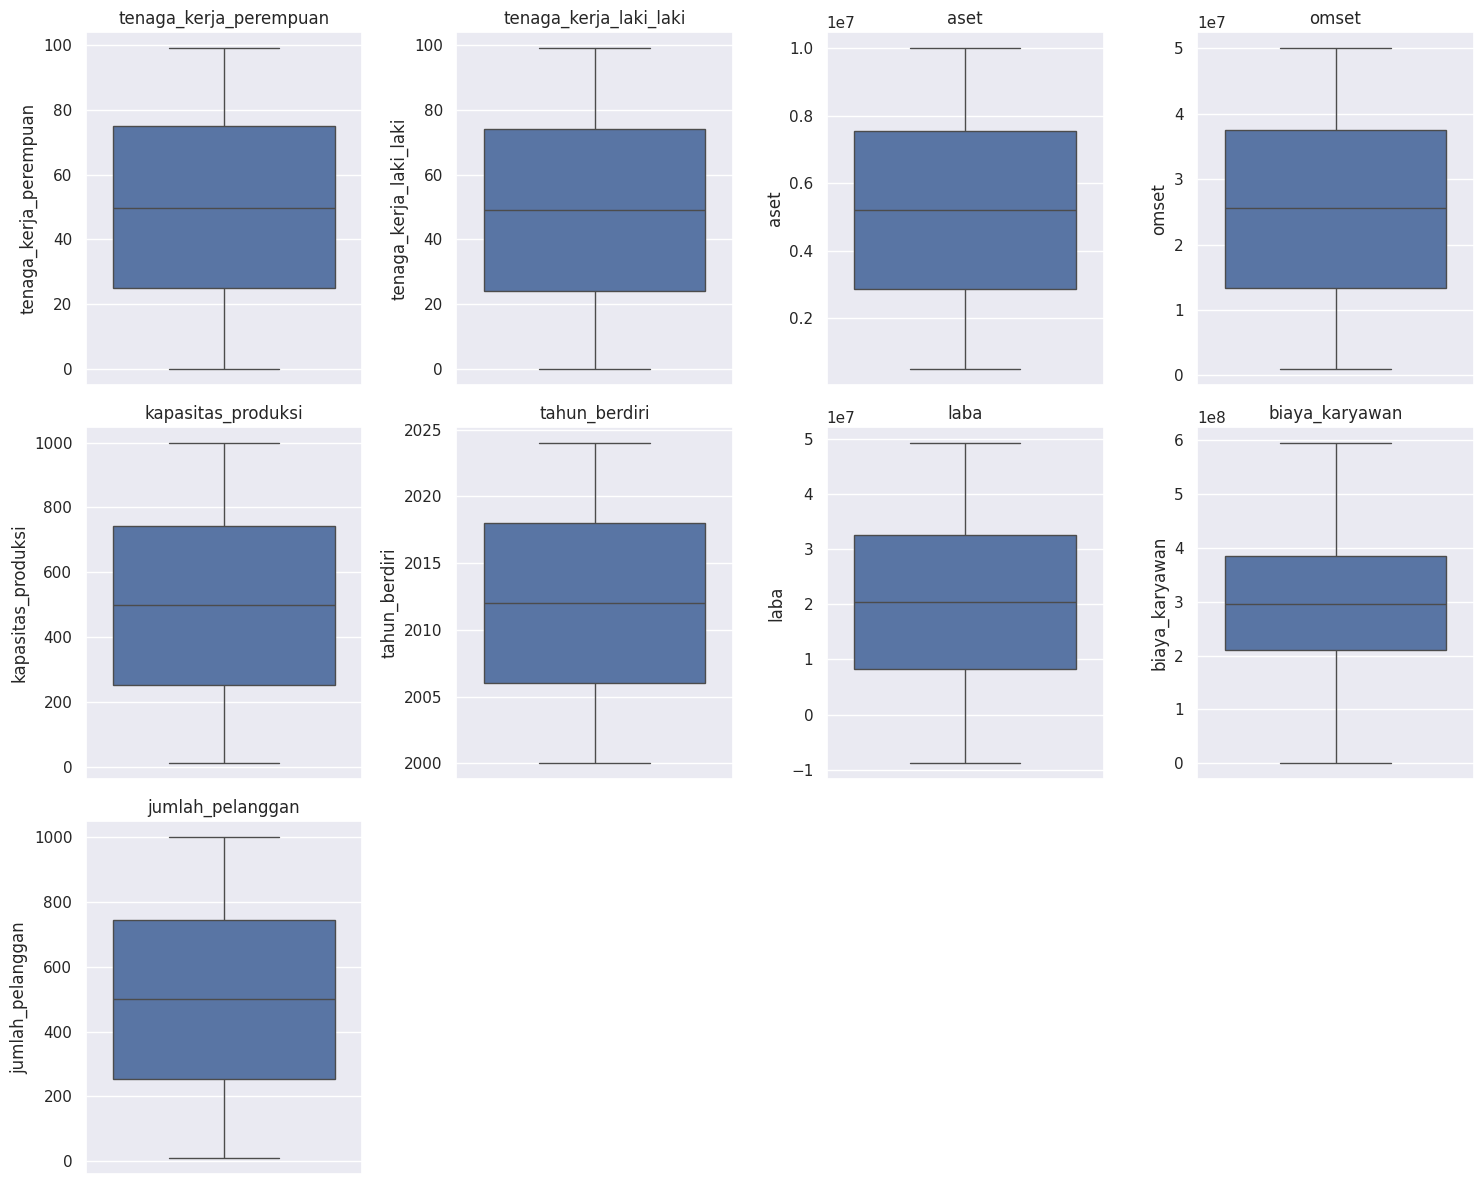

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Kolom numerik yang ingin dicek outliernya
num_cols = ['tenaga_kerja_perempuan',
            'tenaga_kerja_laki_laki',
            'aset',
            'omset',
            'kapasitas_produksi',
            'tahun_berdiri',
            'laba',
            'biaya_karyawan',
            'jumlah_pelanggan']

# Menghitung banyaknya baris yang diperlukan untuk subplot
# Mengganti numerical_cols_for_boxplot dengan num_cols
num_cols_to_plot = len(num_cols)
n_cols = 4 # Number of columns in the subplot grid
n_rows = (num_cols_to_plot + n_cols - 1) // n_cols # Menghitung banyaknya baris yang diperlukan

# Visualisasi Boxplot
plt.figure(figsize=(15, n_rows * 4)) # Ukuran gambar disesuaikan dengan banyaknya baris
# Mengganti numerical_cols_for_boxplot dengan num_cols dalam loop
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

2. IQR

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

tenaga_kerja_perempuan: 0 outliers
tenaga_kerja_laki_laki: 0 outliers
aset: 0 outliers
omset: 0 outliers
kapasitas_produksi: 0 outliers
tahun_berdiri: 0 outliers
laba: 0 outliers
biaya_karyawan: 0 outliers
jumlah_pelanggan: 0 outliers


Dapat dilihat bahwa tidak ada outliers pada seluruh kolom dataset.

# Encoding data kategorik

In [ ]:
from sklearn.preprocessing import OneHotEncoder
One_encoder = OneHotEncoder()

In [ ]:
One_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [ ]:
# Melihat isi dalam kolom jenis_usaha
data['jenis_usaha'].unique()

array(['Kesehatan', 'Perdagangan', 'unknown', 'Jasa', 'Pendidikan',
       'Fashion', 'Makanan & Minuman', 'Perusahaan'], dtype=object)

In [ ]:
# Encoding kolom jenis_usaha
encoded_jenis_usaha = One_encoder.fit_transform(data[['jenis_usaha']])
encoded_jenis_usaha

jenis_usaha_Fashion  jenis_usaha_Jasa  jenis_usaha_Kesehatan  \
0                      0.0               0.0                    1.0   
1                      0.0               0.0                    0.0   
2                      0.0               0.0                    0.0   
3                      0.0               1.0                    0.0   
4                      0.0               1.0                    0.0   
...                    ...               ...                    ...   
13559                  0.0               1.0                    0.0   
13560                  0.0               0.0                    0.0   
13561                  0.0               0.0                    1.0   
13562                  0.0               0.0                    0.0   
13563                  0.0               0.0                    0.0   

       jenis_usaha_Makanan & Minuman  jenis_usaha_Pendidikan  \
0                                0.0                     0.0   
1                                0.0                     0.0   
2                                0.0                     0.0   
3                                0.0                     0.0   
4                                0.0                     0.0   
...                              ...                     ...   
13559                            0.0                     0.0   
13560                            0.0                     1.0   
13561                            0.0                     0.0   
13562                            0.0                     1.0   
13563                            0.0                     1.0   

       jenis_usaha_Perdagangan  jenis_usaha_Perusahaan  jenis_usaha_unknown  
0                          0.0                     0.0                  0.0  
1                          1.0                     0.0                  0.0  
2                          0.0                     0.0                  1.0  
3                          0.0                     0.0                  0.0  
4                          0.0                     0.0                  0.0  
...                        ...                     ...                  ...  
13559                      0.0                     0.0                  0.0  
13560                      0.0                     0.0                  0.0  
13561                      0.0                     0.0                  0.0  
13562                      0.0                     0.0                  0.0  
13563                      0.0                     0.0                  0.0  

[13564 rows x 8 columns]

In [ ]:
# Melihat isi dalam kolom marketplace
data['marketplace'].unique()

array(['Tokopedia', 'Bukalapak', 'Website Sendiri', 'Lazada', 'Shopee',
       'unknown'], dtype=object)

In [ ]:
# Encoding kolom marketplace
encoded_marketplace = One_encoder.fit_transform(data[['marketplace']])
encoded_marketplace

marketplace_Bukalapak  marketplace_Lazada  marketplace_Shopee  \
0                        0.0                 0.0                 0.0   
1                        1.0                 0.0                 0.0   
2                        0.0                 0.0                 0.0   
3                        0.0                 0.0                 0.0   
4                        0.0                 1.0                 0.0   
...                      ...                 ...                 ...   
13559                    0.0                 0.0                 0.0   
13560                    0.0                 0.0                 0.0   
13561                    0.0                 1.0                 0.0   
13562                    0.0                 0.0                 0.0   
13563                    0.0                 0.0                 1.0   

       marketplace_Tokopedia  marketplace_Website Sendiri  marketplace_unknown  
0                        1.0                          0.0                  0.0  
1                        0.0                          0.0                  0.0  
2                        0.0                          1.0                  0.0  
3                        0.0                          1.0                  0.0  
4                        0.0                          0.0                  0.0  
...                      ...                          ...                  ...  
13559                    0.0                          1.0                  0.0  
13560                    0.0                          1.0                  0.0  
13561                    0.0                          0.0                  0.0  
13562                    0.0                          1.0                  0.0  
13563                    0.0                          0.0                  0.0  

[13564 rows x 6 columns]

In [ ]:
# Melihat isi dalam kolom status_legalitas
data['status_legalitas'].unique()

array(['Belum Terdaftar', 'Terdaftar', 'unknown'], dtype=object)

In [ ]:
# Encoding kolom status_legalitas
encoded_status_legalitas = One_encoder.fit_transform(data[['status_legalitas']])
encoded_status_legalitas

status_legalitas_Belum Terdaftar  status_legalitas_Terdaftar  \
0                                   1.0                         0.0   
1                                   0.0                         1.0   
2                                   1.0                         0.0   
3                                   1.0                         0.0   
4                                   1.0                         0.0   
...                                 ...                         ...   
13559                               1.0                         0.0   
13560                               0.0                         1.0   
13561                               0.0                         1.0   
13562                               1.0                         0.0   
13563                               0.0                         1.0   

       status_legalitas_unknown  
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0  
...                         ...  
13559                       0.0  
13560                       0.0  
13561                       0.0  
13562                       0.0  
13563                       0.0  

[13564 rows x 3 columns]

In [ ]:
# Melihat keseluruhan info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_umkm                 13564 non-null  object 
 1   nama_usaha              13564 non-null  object 
 2   jenis_usaha             13564 non-null  object 
 3   tenaga_kerja_perempuan  13564 non-null  float64
 4   tenaga_kerja_laki_laki  13564 non-null  float64
 5   aset                    13564 non-null  float64
 6   omset                   13564 non-null  float64
 7   marketplace             13564 non-null  object 
 8   kapasitas_produksi      13564 non-null  float64
 9   status_legalitas        13564 non-null  object 
 10  tahun_berdiri           13564 non-null  float64
 11  laba                    13564 non-null  float64
 12  biaya_karyawan          13564 non-null  float64
 13  jumlah_pelanggan        13564 non-null  float64
dtypes: float64(9), object(5)
memory usage:

In [ ]:
# Melihat statistika deskriptif dataset
data.describe()

tenaga_kerja_perempuan  tenaga_kerja_laki_laki          aset  \
count            13564.000000            13564.000000  1.356400e+04   
mean                49.699359               49.138432  5.223369e+06   
std                 28.882848               28.900886  2.721822e+06   
min                  0.000000                0.000000  5.002330e+05   
25%                 25.000000               24.000000  2.869516e+06   
50%                 49.699359               49.000000  5.223369e+06   
75%                 75.000000               74.000000  7.552350e+06   
max                 99.000000               99.000000  9.999760e+06   

              omset  kapasitas_produksi  tahun_berdiri          laba  \
count  1.356400e+04        13564.000000   13564.000000  1.356400e+04   
mean   2.555608e+07          499.804776    2012.028654  2.033591e+07   
std    1.413997e+07          283.985433       7.229116  1.441770e+07   
min    1.000509e+06           10.000000    2000.000000 -8.838836e+06   
25%    1.337262e+07          253.000000    2006.000000  8.189439e+06   
50%    2.555608e+07          499.804776    2012.000000  2.033591e+07   
75%    3.757549e+07          743.000000    2018.000000  3.254278e+07   
max    4.999970e+07          999.000000    2024.000000  4.919930e+07   

       biaya_karyawan  jumlah_pelanggan  
count    1.356400e+04      13564.000000  
mean     2.963712e+08        499.655309  
std      1.222875e+08        283.824305  
min      0.000000e+00         10.000000  
25%      2.100000e+08        253.000000  
50%      2.963712e+08        499.655309  
75%      3.840000e+08        743.000000  
max      5.940000e+08        999.000000

# Optimalisasi penyaluran bantuan pemerintah berdasarkan aset, omset, dan laba untuk UMKM menggunakan *K-Means Clustering*

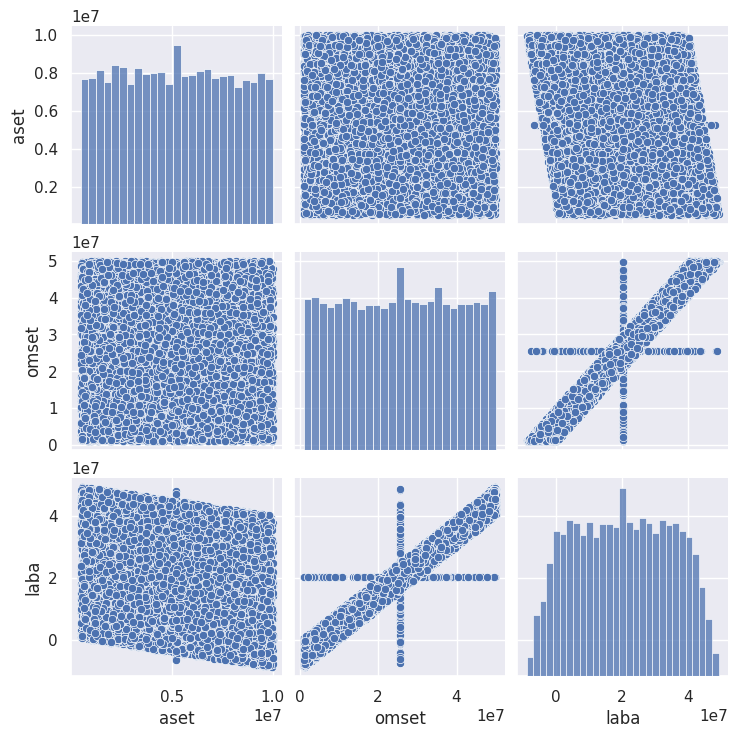

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#melihat hubungan antar variabel
sns.pairplot(data[['aset',
                   'omset',
                   'laba']])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Skalalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['aset',
                                      'omset',
                                      'laba']])

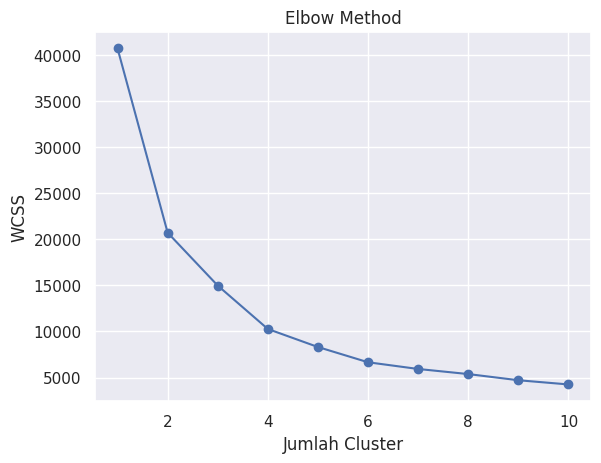

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Melihat data terbaik dari elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

Dapat dilihat bahwa pada jumlah *cluster* 2, grafik terlihat lebih menyiku. Sehingga, dapat disimpulkan bahwa jumlah *cluster* terbaik yaitu 2.

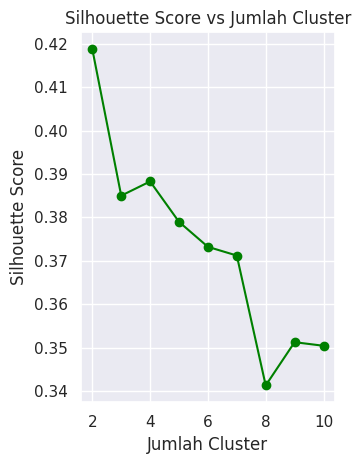

In [ ]:
from sklearn.metrics import silhouette_score
# Inisialisasi list untuk menyimpan nilai silhouette score
silhouette_scores = []

# Siluet melihat semua kemungkinan klaster yg baik yg mana dgn melihat skor tertinggi
for i in range(2, 11):  # Mulai dari k=2 karena silhouette score tidak dapat dihitung untuk k=1
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)

    # Hitung Silhouette Score untuk setiap nilai k
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

    # Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

Dapat dilihat bahwa *silhouette score* tertinggi pada *cluster* 2. Sehingga, dapat disimpulkan bahwa jumlah *cluster* terbaik yaitu 2.

In [ ]:
# Mengklasterkan UMKM menjadi 2 klaster berdasarkan aset, omset, laba, dan biaya_karyawan'
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data['Cluster_KMeans_Aset_Omset_Laba'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Memilih hanya kolom numerik dan kolom klaster baru
numeric_cols_to_group_specific = ['aset',
                                  'omset',
                                  'laba',
                                  'Cluster_KMeans_Aset_Omset_Laba']

# Memastikan kolom yang dipilih ada di DataFrame
valid_numeric_cols_specific = [col for col in numeric_cols_to_group_specific if col in data.columns]

# Membuat grup untuk melihat rata-rata dari klaster
# Kolom 'Cluster_KMeans_Aset_Omset_Laba_Biaya' sekarang harus ada di DataFrame
cluster_means_specific = data[valid_numeric_cols_specific].groupby('Cluster_KMeans_Aset_Omset_Laba').mean()

print(cluster_means_specific)

                                        aset         omset          laba
Cluster_KMeans_Aset_Omset_Laba                                          
0                               5.488001e+06  1.331978e+07  7.866784e+06
1                               4.964603e+06  3.752117e+07  3.252868e+07


Dapat dilihat bahwa cluster 0 memiliki aset yang banyak, omset yang sedikit dan laba yang sedikit. Sedangkan cluster 1 memiliki aset yang lebih sedikit, dengan omset dan laba yang banyak.
Dalam hal ini, cluster 0 masih memerlukan bantuan pemerintah dalam menangani fenomena yang terjadi.


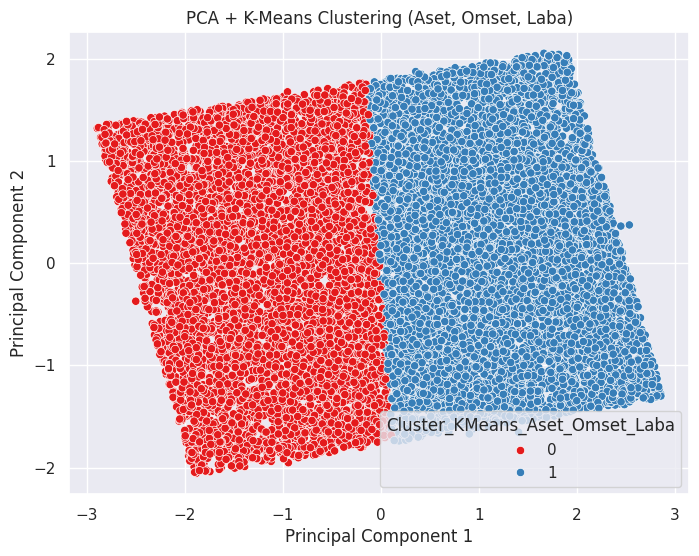

In [ ]:
# Opsional: Visualisasi hasil clustering (gunakan PCA jika dimensinya > 2)
from sklearn.decomposition import PCA

if X_scaled.shape[1] > 2:
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['Cluster_KMeans_Aset_Omset_Laba'], palette='Set1')
    plt.title('PCA + K-Means Clustering (Aset, Omset, Laba)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
else:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=data['Cluster_KMeans_Aset_Omset_Laba'], palette='Set1')
    plt.title('K-Means Clustering (Aset vs Omset)')
    plt.xlabel('aset (Scaled)')
    plt.ylabel('omset (Scaled)')

plt.show()

In [ ]:
# Menampilkan nama_usaha per Cluster
for cluster_id in sorted(data['Cluster_KMeans_Aset_Omset_Laba'].unique()):
    nama_cluster = data[data['Cluster_KMeans_Aset_Omset_Laba'] == cluster_id]['nama_usaha'].tolist()
    print(f"Nama usaha di Cluster {cluster_id}:")
    for nama in nama_cluster:
        print(f"- {nama}")
    print("-" * 20) # Pembatas antar cluster

Nama usaha di Cluster 0:
- UD. Alif Pamungkas
- UD. Winda Jayengprana
- UD. Damaris Satria
- UD. Qasya Wiratama
- UD. Grego Wiraatmaja Nara
- UD. Mika Bagaskara
- UD. Yora Selaras
- UD. Karim Asmaralaya
- UD. Elyas Wiraatmaja
- UD. Erlangga Wiyata
- UD. Hasna Saputranegara
- UD. Halim Surya
- UD. Yudi Kamajaya
- UD. Tari Jayeng
- UD. Uli Widhi
- UD. Clarissa Cahaya
- UD. Nisa Hastinapura
- UD. Chiko Suryaatmaja
- UD. Damar Panji
- UD. Kinan Buana
- UD. Niken Lintang
- UD. Lidya Pamungkas
- UD. Farid Agastya
- UD. Yumna Sentosa
- UD. Yusuf Suryaputra
- UD. Krisna Trisula
- UD. Heri Wiyata
- UD. Sekar Trijaya
- UD. Fajar Darussalam Lukita
- UD. Yumna Wira
- UD. Nazar Baruna
- UD. Nazar Dwijaputra Dito
- UD. Lutfi Reswara
- UD. Ujang Wibawa
- UD. Jafar Sanjaya
- UD. Xenia Nirbayu
- UD. Jihan Gatra
- UD. Lukman Wangi
- UD. Gema Prana
- UD. Celsi Cahyaningrat
- UD. Hilmiyah Tunggul
- UD. Cipta Nawasena Qira
- UD. Qisya Berkarya Pandu
- UD. Ujang Kusumah Erlangga
- UD. Nina Sanjaya
- UD. Jay

# Melihat kebutuhan tenaga kerja UMKM berdasarkan tenaga kerja perempuan, tenaga kerja laki-laki, kapasitas produksi, biaya karyawan, dan jumlah pelanggan menggunakan K-Means Clustering

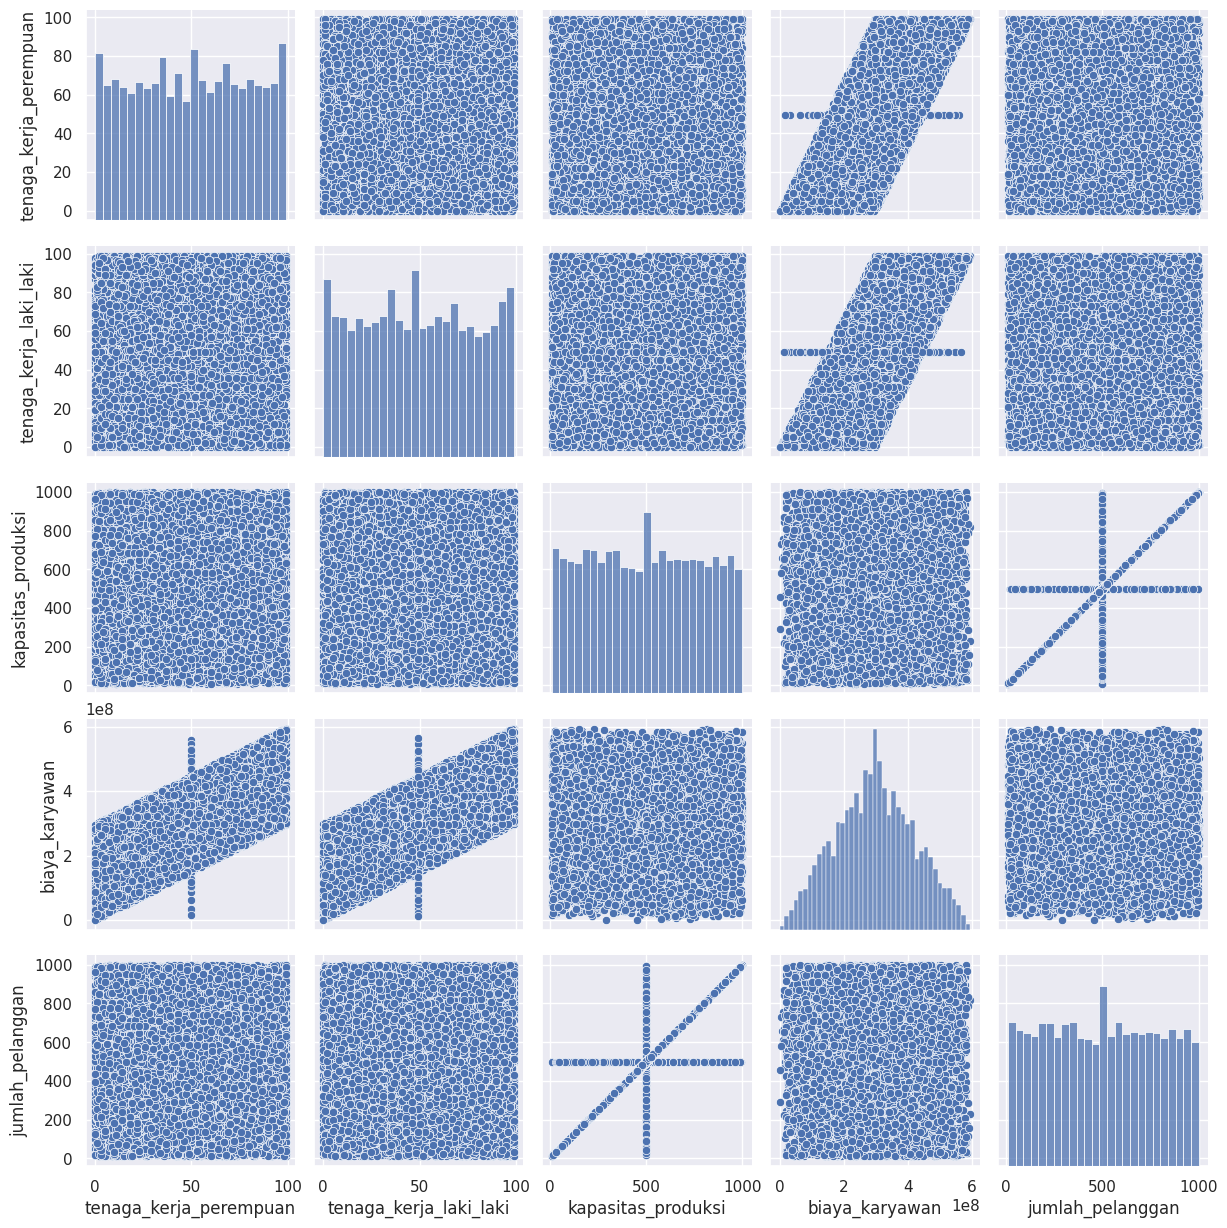

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#melihat hubungan antar variabel
sns.pairplot(data[['tenaga_kerja_perempuan',
                   'tenaga_kerja_laki_laki',
                   'kapasitas_produksi',
                   'biaya_karyawan',
                   'jumlah_pelanggan']])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

#biar datanya ada di rentang skala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['tenaga_kerja_perempuan',
                                      'tenaga_kerja_laki_laki',
                                      'kapasitas_produksi',
                                      'biaya_karyawan',
                                      'jumlah_pelanggan']])

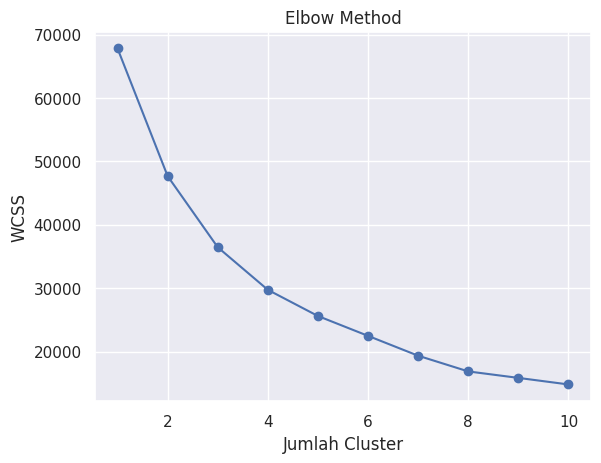

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Melihat data terbaik dari elbow method, kalau yg menyiku berarti itu yg terbaik
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

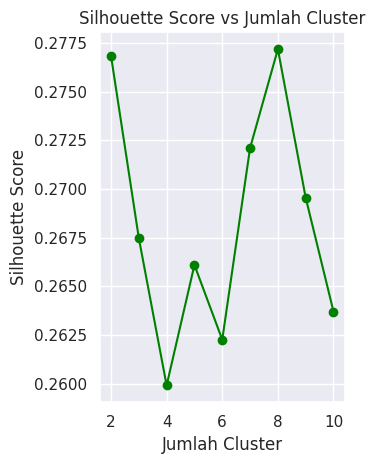

In [ ]:
from sklearn.metrics import silhouette_score
# Inisialisasi list untuk menyimpan nilai silhouette score
silhouette_scores = []

# Melihat semua kemungkinan klaster yang terbaik dengan melihat skor tertinggi
for i in range(2, 11):  # Mulai dari k=2 karena silhouette score tidak dapat dihitung untuk k=1
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)

    # Hitung Silhouette Score untuk setiap nilai k
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

    # Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

Dapat dilihat bahwa silhouette score tertinggi pada cluster 8. Sehingga, dapat disimpulkan bahwa jumlah cluster terbaik yaitu 8.

In [ ]:
# Mengklasterkan data menjadi 8 klaster
kmeans = KMeans(n_clusters=8, random_state=42)
data['Cluster_KMeans_Lk_P_Kapasitas_Biaya_Jumlah'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Memilih kolom numerik dan kolom klaster baru
numeric_cols_to_group_specific = ['tenaga_kerja_perempuan',
                                  'tenaga_kerja_laki_laki',
                                 'kapasitas_produksi',
                                  'biaya_karyawan',
                                  'jumlah_pelanggan',
                                  'Cluster_KMeans_Lk_P_Kapasitas_Biaya_Jumlah']

# Memastikan kolom yang dipilih ada di DataFrame
valid_numeric_cols_specific = [col for col in numeric_cols_to_group_specific if col in data.columns]

# Membuat grup untuk melihat rata-rata dari klaster dengan Kolom 'Cluster_KMeans_Lk_P_Kapasitas_Biaya_Jumlah' harus ada di DataFrame
cluster_means_specific = data[valid_numeric_cols_specific].groupby('Cluster_KMeans_Lk_P_Kapasitas_Biaya_Jumlah').mean()

print(cluster_means_specific)

                                            tenaga_kerja_perempuan  \
Cluster_KMeans_Lk_P_Kapasitas_Biaya_Jumlah                           
0                                                        26.070175   
1                                                        75.930165   
2                                                        75.651344   
3                                                        72.246418   
4                                                        22.024081   
5                                                        73.600051   
6                                                        25.137152   
7                                                        26.551799   

                                            tenaga_kerja_laki_laki  \
Cluster_KMeans_Lk_P_Kapasitas_Biaya_Jumlah                           
0                                                        71.995707   
1                                                        75.960691   
2                  

Dari hasil output tersebut dapat dilihat bahwa cluster 6 memiliki tenaga kerja perempuan dan tenaga kerja laki-laki yang sedikit dengan biaya karyawan yang sedikit, kapasitas produksi terbanyak, dan jumlah pelanggan terbanyak.
Oleh karena itu, cluster 6 memerlukan tenaga kerja tambahan agar dapat memenuhi kapasitas produksi dan jumlah pelanggan yang banyak.



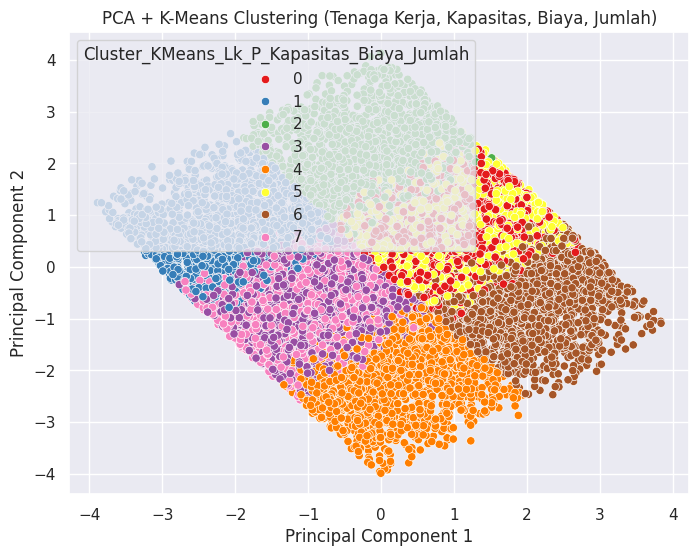

In [ ]:
# Visualisasi hasil clustering (gunakan PCA jika dimensinya > 2)
from sklearn.decomposition import PCA

if X_scaled.shape[1] > 2:
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['Cluster_KMeans_Lk_P_Kapasitas_Biaya_Jumlah'], palette='Set1')
    plt.title('PCA + K-Means Clustering (Tenaga Kerja, Kapasitas, Biaya, Jumlah)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
else:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=data['Cluster_KMeans_Lk_P_Kapasitas_Biaya_Jumlah'], palette='Set1')
    plt.title('K-Means Clustering (Kapasitas produksi vs Jumlah Pelanggan)')
    plt.xlabel('kapasitas_produksi (Scaled)')
    plt.ylabel('jumlah_pelanggan (Scaled)')

plt.show()

In [ ]:
# Menampilkan nama_usaha per Cluster
for cluster_id in sorted(data['Cluster_KMeans_Lk_P_Kapasitas_Biaya_Jumlah'].unique()):
    nama_cluster = data[data['Cluster_KMeans_Lk_P_Kapasitas_Biaya_Jumlah'] == cluster_id]['nama_usaha'].tolist()
    print(f"Nama usaha di Cluster {cluster_id}:")
    for nama in nama_cluster:
        print(f"- {nama}")
    print("-" * 20) # Pembatas antar cluster

Nama usaha di Cluster 0:
- UD. Mika Bagaskara
- UD. Karim Asmaralaya
- UD. Elyas Wiraatmaja
- UD. Putri Wiraatmaja Rafif
- UD. Dea Tunggul Ziva
- UD. Clarissa Cahaya
- UD. Yusuf Suryaputra
- UD. Diyan Prawira
- UD. Ujang Wibawa
- UD. Fikri Jaladara
- UD. Gema Prana
- UD. Sekar Siang
- UD. Qyla Prana Balqis
- UD. Qanita Mandiri
- UD. Wulan Sukma Fikri
- UD. Damar Wibawa
- UD. Wira Gatra
- UD. Krisna Segar
- UD. Pasha Atma
- UD. Pandu Adhi
- UD. Zulkarnaen Agastya
- UD. Desi Tirta
- UD. Lukita Panji
- UD. Okta Tejakencana
- UD. Vega Putra
- UD. Eni Lempung
- UD. Oki Bima
- UD. Vina Lingga
- UD. Jafar Harmoni
- UD. Riyan Wirajaya
- UD. Jihan Pancasila
- UD. Obed Siang Mega
- UD. Hana Baswara
- UD. Mila Anugerah Zainab
- UD. Echa Bahari
- UD. Uli Cerah
- UD. Farid Indah
- UD. Erni Bratadikara
- UD. Chiko Sidarta
- UD. Diva Sahaja
- UD. Zulkarnaen Sumringah
- UD. Winda Raharja
- UD. Yasir Rejo
- UD. Ujang Pelangi
- UD. Adinda Hilir
- UD. Naufal Gita
- UD. Tari Hilir
- UD. Pasha Sidarta
- UD

# Segmentasi Profil Usaha Berdasarkan Status Legalitas Menggunakan K-Means Clustering

In [ ]:
# Pilih kolom yang akan digunakan untuk clustering
categorical_features = ['jenis_usaha', 'marketplace', 'status_legalitas']
numerical_features = ['tahun_berdiri'] # Kolom tahun_berdiri diasumsikan sudah diubah menjadi numerik

In [ ]:
# Memisahkan data yang akan diencoding dan discale
data_clustering = data[categorical_features + numerical_features].copy()

In [ ]:
# Memastikan bahwa kolom tahun_berdiri adalah tipe data numerik (int atau float)
data_clustering['tahun_berdiri'] = pd.to_numeric(data_clustering['tahun_berdiri'], errors='coerce')

In [ ]:
# Penanganan missing values jika ada pada kolom tahun_berdiri setelah konversi
if data_clustering['tahun_berdiri'].isnull().sum() > 0:
  data_clustering['tahun_berdiri'].fillna(data_clustering['tahun_berdiri'].mean(), inplace=True)
  print(f"Missing values pada 'tahun_berdiri' setelah konversi diisi dengan mean.")


In [ ]:
# Buat preprocessor untuk One-Hot Encode kolom kategorikal dan Scale kolom numerik
# Menggunakan ColumnTransformer untuk menerapkan transformasi yang berbeda pada kolom yang berbeda
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        # Set sparse_output=False for OneHotEncoder to get dense output
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    # remainder='passthrough' is fine, but not strictly necessary if data_clustering
    # only contains the specified features. Let's keep it for robustness.
    remainder='passthrough'
)

In [ ]:
# Menerapkan preprocessor pada data dengan output berupa array numpy because sparse_output=False is set
X_processed = preprocessor.fit_transform(data_clustering)

In [ ]:
# Mengonversi kembali ke DataFrame
# Mendapatkan nama kolom setelah encoding menggunakan get_feature_names_out() from the ColumnTransformer
all_feature_names = preprocessor.get_feature_names_out()

In [ ]:
# Membuat DataFrame dari proses dense array dengan nama kolom yang benar
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names, index=data_clustering.index)

In [ ]:
print("\nData setelah Encoding dan Scaling:")
print(X_processed_df.head())
print("\nShape data setelah proses: ", X_processed_df.shape)


Data setelah Encoding dan Scaling:
   cat__jenis_usaha_Fashion  cat__jenis_usaha_Jasa  \
0                       0.0                    0.0   
1                       0.0                    0.0   
2                       0.0                    0.0   
3                       0.0                    1.0   
4                       0.0                    1.0   

   cat__jenis_usaha_Kesehatan  cat__jenis_usaha_Makanan & Minuman  \
0                         1.0                                 0.0   
1                         0.0                                 0.0   
2                         0.0                                 0.0   
3                         0.0                                 0.0   
4                         0.0                                 0.0   

   cat__jenis_usaha_Pendidikan  cat__jenis_usaha_Perdagangan  \
0                          0.0                           0.0   
1                          0.0                           1.0   
2                          0.0  

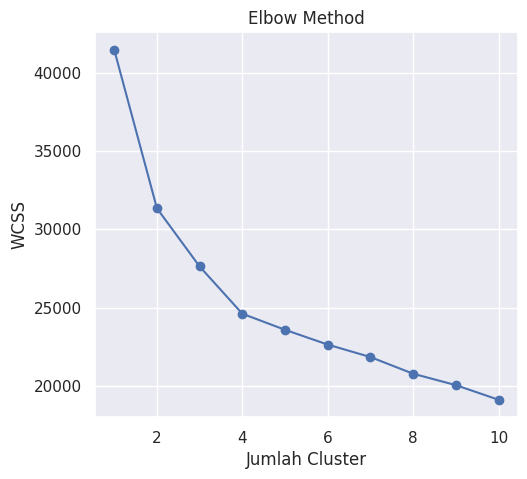

In [ ]:
# Melihat data terbaik dari elbow method
wcss = []
# Gunakan X_processed (dense array numpy) untuk clustering
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.grid(True)

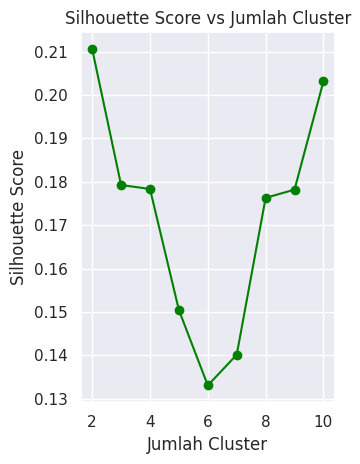

In [ ]:
# Inisialisasi list untuk menyimpan nilai silhouette score
silhouette_scores = []

# Melihat cluster terbaik menggunakan Silhouette Score dengan melihat skor tertinggi
# Mulai dari k=2 karena silhouette score tidak dapat dihitung untuk k=1
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_processed)

    # Hitung Silhouette Score untuk setiap nilai k
    silhouette_avg = silhouette_score(X_processed, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

Dapat dilihat bahwa silhouette score tertinggi pada cluster 2. Sehingga, dapat disimpulkan bahwa jumlah cluster terbaik yaitu 2.

In [ ]:
optimal_clusters = 2 # Diasumsikan 2 adalah jumlah cluster terbaik berdasarkan silhouette score

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
# Lakukan fit dan prediksi pada data yang sudah diproses
data['Cluster_KMeans_Kategorik_Tahun'] = kmeans.fit_predict(X_processed)

In [ ]:
# Analisis Hasil Clustering

print(f"\nHasil Clustering dengan {optimal_clusters} cluster:")
print(data[['id_umkm'] + categorical_features + numerical_features + ['Cluster_KMeans_Kategorik_Tahun']].head())


Hasil Clustering dengan 2 cluster:
    id_umkm  jenis_usaha      marketplace status_legalitas  tahun_berdiri  \
0  28828567    Kesehatan        Tokopedia  Belum Terdaftar         2015.0   
1  28828568  Perdagangan        Bukalapak        Terdaftar         2014.0   
2  28828569      unknown  Website Sendiri  Belum Terdaftar         2000.0   
3  28828570         Jasa  Website Sendiri  Belum Terdaftar         2003.0   
4  28828571         Jasa           Lazada  Belum Terdaftar         2002.0   

   Cluster_KMeans_Kategorik_Tahun  
0                               1  
1                               1  
2                               0  
3                               0  
4                               0  


In [ ]:
# Mengubah kolom tahun_berdiri ke bentuk numerik sebelum dilakukan perhitungan mean
# Gunakan errors='coerce' to turn non-numeric values into NaN
data['tahun_berdiri'] = pd.to_numeric(data['tahun_berdiri'], errors='coerce')

In [ ]:
# Isi missing value menggunakan mean
if data['tahun_berdiri'].isnull().sum() > 0:
    # Perhitungan mean setelah coercion tapi sebelum pengisian
    mean_tahun_berdiri = data['tahun_berdiri'].mean()
    data['tahun_berdiri'].fillna(mean_tahun_berdiri, inplace=True)
    print(f"Missing values in 'tahun_berdiri' after coercion filled with mean: {mean_tahun_berdiri:.2f}")

In [ ]:
print("\nRata-rata 'tahun_berdiri' per Cluster:")
# Perhitungan mean
print(data.groupby('Cluster_KMeans_Kategorik_Tahun')['tahun_berdiri'].mean())

print("\nDistribusi 'jenis_usaha' per Cluster:")
print(pd.crosstab(data['Cluster_KMeans_Kategorik_Tahun'], data['jenis_usaha']))

print("\nDistribusi 'marketplace' per Cluster:")
print(pd.crosstab(data['Cluster_KMeans_Kategorik_Tahun'], data['marketplace']))

print("\nDistribusi 'status_legalitas' per Cluster:")
print(pd.crosstab(data['Cluster_KMeans_Kategorik_Tahun'], data['status_legalitas']))


Rata-rata 'tahun_berdiri' per Cluster:
Cluster_KMeans_Kategorik_Tahun
0    2005.736846
1    2018.206467
Name: tahun_berdiri, dtype: float64

Distribusi 'jenis_usaha' per Cluster:
jenis_usaha                     Fashion  Jasa  Kesehatan  Makanan & Minuman  \
Cluster_KMeans_Kategorik_Tahun                                                
0                                    11  1711       1633                 17   
1                                    15  1789       1632                 18   

jenis_usaha                     Pendidikan  Perdagangan  Perusahaan  unknown  
Cluster_KMeans_Kategorik_Tahun                                                
0                                     1608         1704          21       15  
1                                     1650         1698          23       19  

Distribusi 'marketplace' per Cluster:
marketplace                     Bukalapak  Lazada  Shopee  Tokopedia  \
Cluster_KMeans_Kategorik_Tahun                                         
0   

Dari output tersebut dapat dilihat bahwa:
1. UMKM cluster 0 berdiri lebih lama, dengan jenis usaha terbanyak yaitu jenis jasa, marketplace terbanyak yaitu website sendiri, serta status legalitas terbanyak yaitu belum terdaftar.  
2. UMKM cluster 1 adalah UMKM yang cukup baru, dengan jenis usaha terbanyak yaitu jenis jasa, marketplace terbanyak yaitu website sendiri, serta status legalitas terbanyak yaitu terdaftar.



Sehingga, UMKM cluster 1 adalah cluster UMKM yang cukup baru dan memiliki status legalitas terdaftar terbanyak.

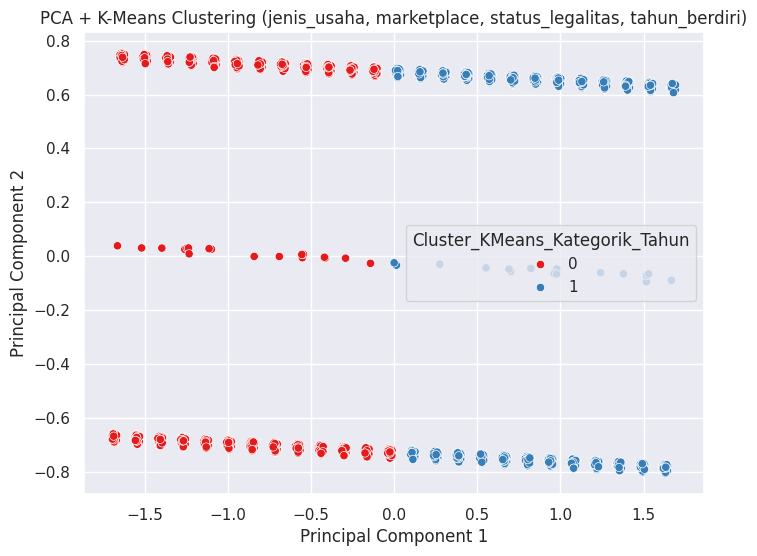

In [ ]:
# Opsional: Visualisasi hasil clustering menggunakan PCA jika dimensi > 2
# Gunakan X_processed (data setelah encoding dan scaling) untuk PCA
if X_processed.shape[1] > 2:
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_processed)
    plt.figure(figsize=(8,6))
    # Use X_pca for plotting, hue based on the cluster column added to the original data
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['Cluster_KMeans_Kategorik_Tahun'], palette='Set1')
    plt.title(f'PCA + K-Means Clustering ({", ".join(categorical_features + numerical_features)})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
# The 'else' part is not needed because the shape is > 2 after encoding.
# else: # Jika hanya 2 fitur setelah processing (misalnya hanya 2 kolom kategorikal yang di-encode menjadi 2 kolom)
#     plt.figure(figsize=(8,6))
#     sns.scatterplot(x=X_processed[:, 0], y=X_processed[:, 1], hue=data['Cluster_KMeans_Kategorik_Tahun'], palette='Set1')
#     plt.title(f'K-Means Clustering ({all_feature_names[0]} vs {all_feature_names[1]})')
#     plt.xlabel(f'{all_feature_names[0]} (Scaled)')
#     plt.ylabel(f'{all_feature_names[1]} (Scaled)')


plt.show()

In [ ]:
# Menampilkan nama_usaha per Cluster
for cluster_id in sorted(data['Cluster_KMeans_Kategorik_Tahun'].unique()):
     nama_cluster = data[data['Cluster_KMeans_Kategorik_Tahun'] == cluster_id]['nama_usaha'].tolist()
     print(f"Nama usaha di Cluster {cluster_id}:")
     for nama in nama_cluster:
         print(f"- {nama}")
     print("-" * 20) # Pembatas antar cluster

Nama usaha di Cluster 0:
- UD. Winda Jayengprana
- UD. Damaris Satria
- UD. Qasya Wiratama
- UD. Grego Wiraatmaja Nara
- UD. Mika Bagaskara
- UD. Yora Selaras
- UD. Wenny Langit
- UD. Fani Wijaya
- UD. Jafar Gandewa
- UD. Erlangga Wiyata
- UD. Halim Surya
- UD. Farhan Mulyo
- UD. Iqra Panji
- UD. Tono Surapati
- UD. Clarissa Cahaya
- UD. Nisa Hastinapura
- UD. Chiko Suryaatmaja
- UD. Damar Panji
- UD. Kinan Buana
- UD. Lidya Pamungkas
- UD. Farid Agastya
- UD. Anang Baswara
- UD. Sekar Trijaya
- UD. Diyan Prawira
- UD. Yumna Wira
- UD. Nazar Baruna
- UD. Nazar Dwijaputra Dito
- UD. Dewi Mandiri
- UD. Fikri Jaladara
- UD. Jasmin Prajurit
- UD. Ony Nawasena
- UD. Carissa Rejo
- UD. Jihan Prima
- UD. Mira Kelana
- UD. Sekar Siang
- UD. Hanafi Bagaskara
- UD. Gema Wijaksana
- UD. Niken Ananta
- UD. Qanita Mandiri
- UD. Candra Kalbu
- UD. Riko Wening
- UD. Xenia Paningrat Najwa
- UD. Via Wijapranata Yusuf
- UD. Pandu Adhi
- UD. Wira Kamajaya
- UD. Anisa Galuh
- UD. Farhan Sukarela Qomar
- U

jenis_usaha          object
marketplace          object
status_legalitas     object
tahun_berdiri       float64
dtype: object


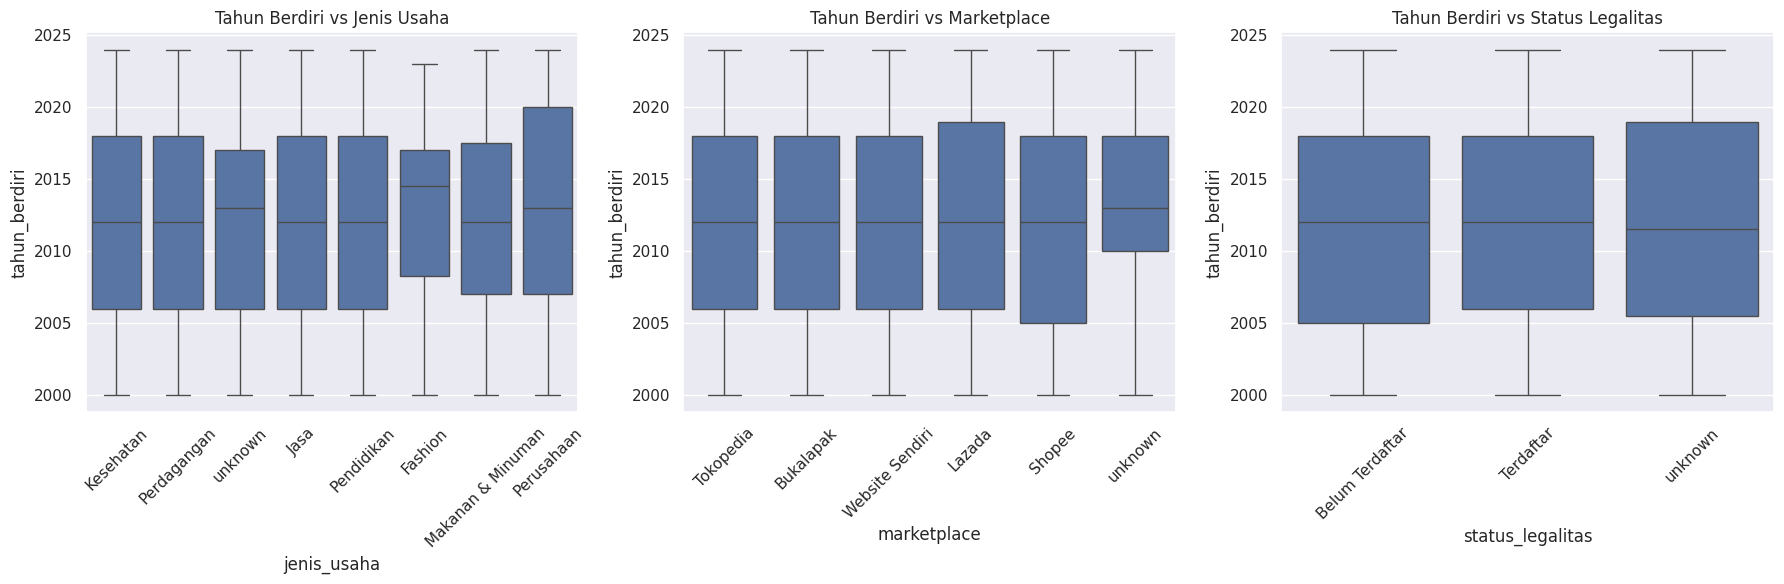

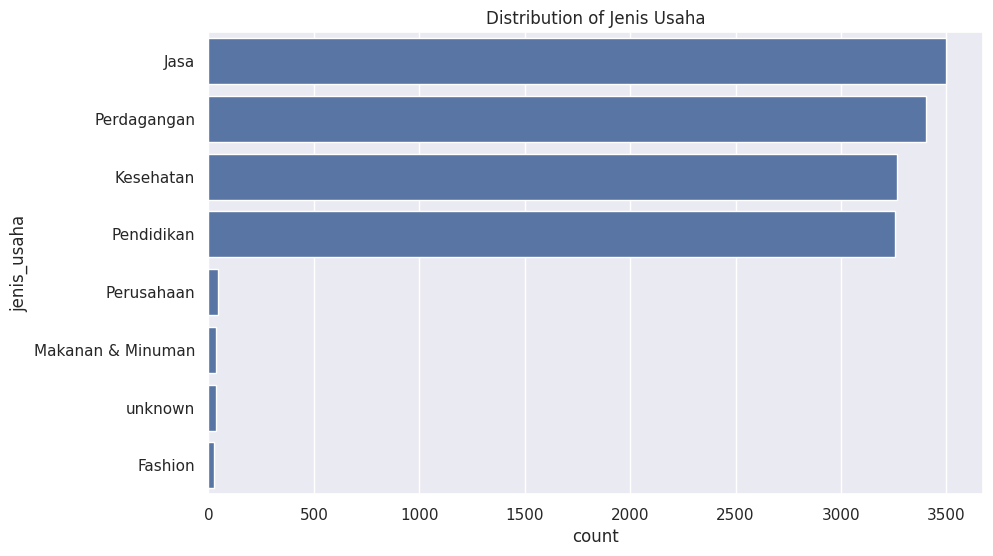

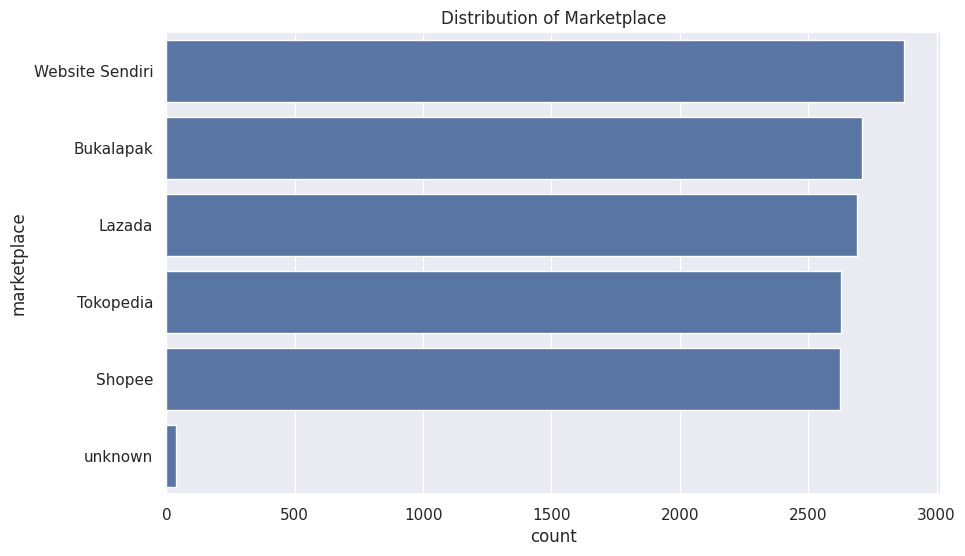

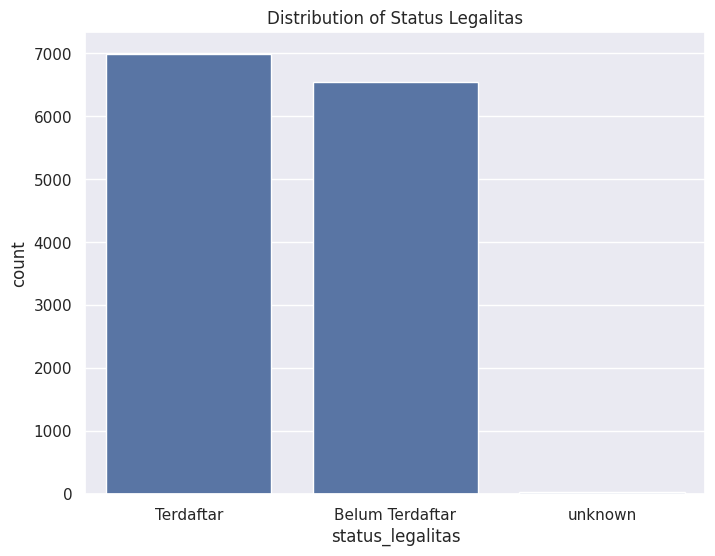

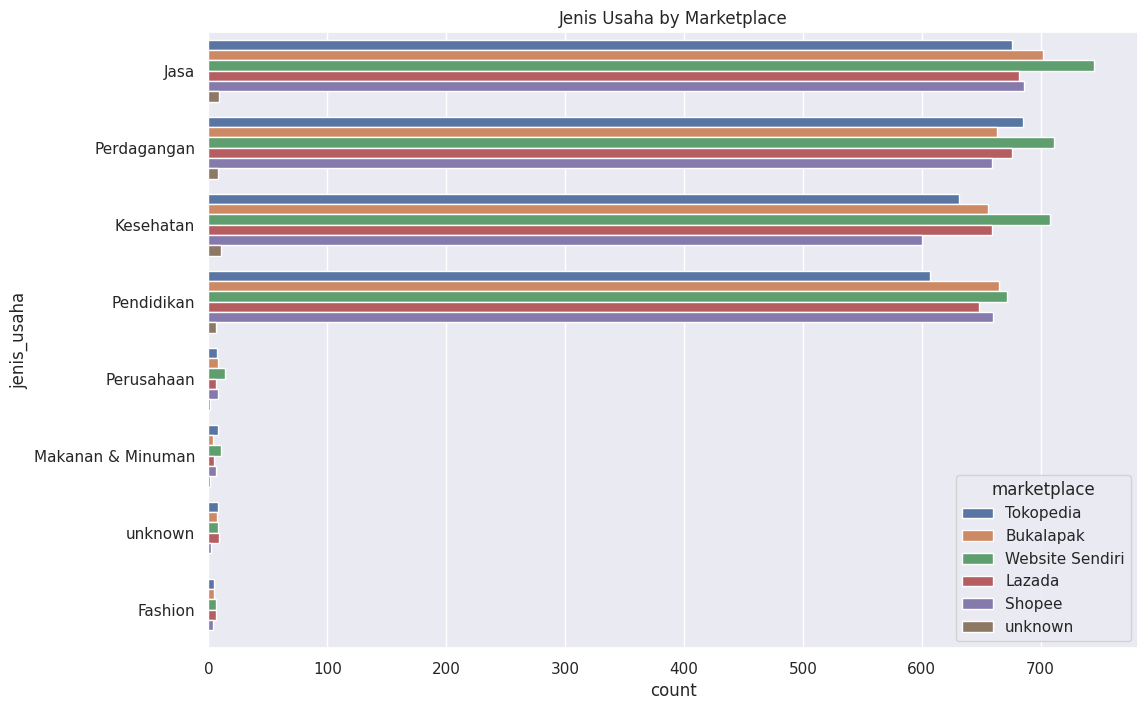

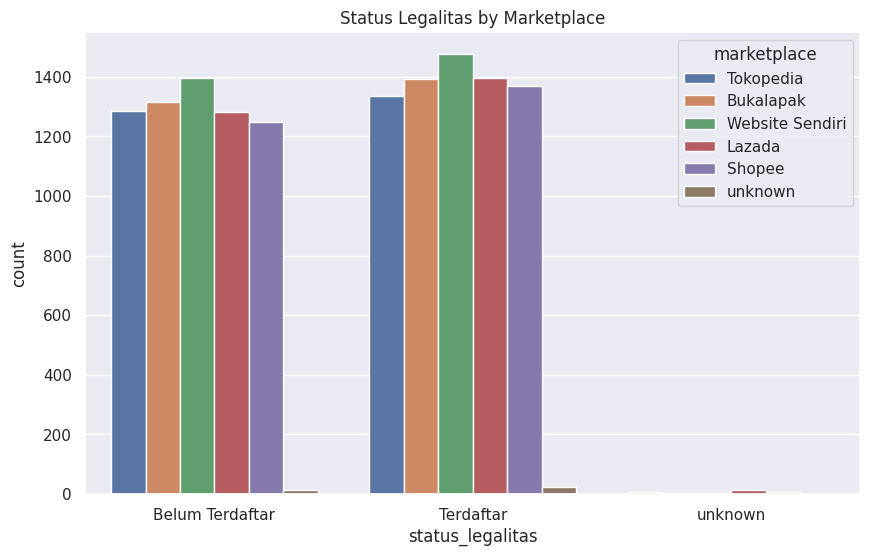


Contingency Table (Jenis Usaha vs Marketplace):
marketplace        Bukalapak  Lazada  Shopee  Tokopedia  Website Sendiri  \
jenis_usaha                                                                
Fashion                    5       6       4          5                6   
Jasa                     702     682     686        676              745   
Kesehatan                656     659     600        631              708   
Makanan & Minuman          4       5       6          8               11   
Pendidikan               665     648     660        607              672   
Perdagangan              663     676     659        685              711   
Perusahaan                 8       6       8          7               14   
unknown                    7       9       2          8                8   

marketplace        unknown  
jenis_usaha                 
Fashion                  0  
Jasa                     9  
Kesehatan               11  
Makanan & Minuman        1  
Pendidikan      

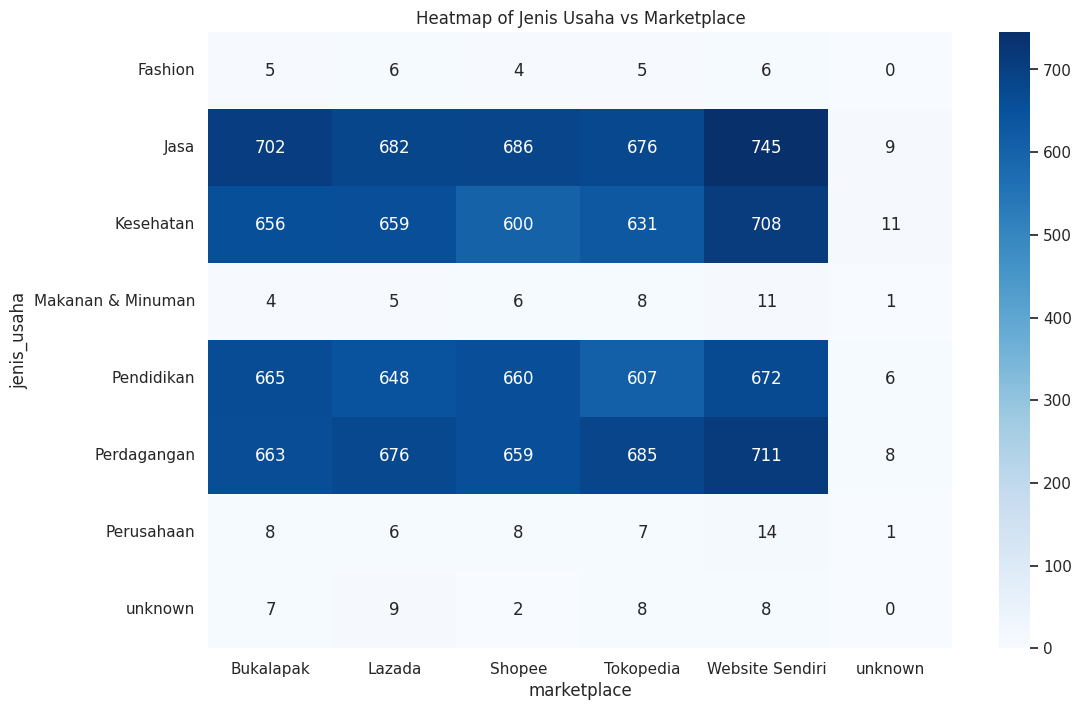


Contingency Table (Jenis Usaha vs Status Legalitas):
status_legalitas   Belum Terdaftar  Terdaftar  unknown
jenis_usaha                                           
Fashion                         10         16        0
Jasa                          1673       1813       14
Kesehatan                     1576       1682        7
Makanan & Minuman               10         25        0
Pendidikan                    1605       1645        8
Perdagangan                   1623       1772        7
Perusahaan                      20         24        0
unknown                         21         13        0


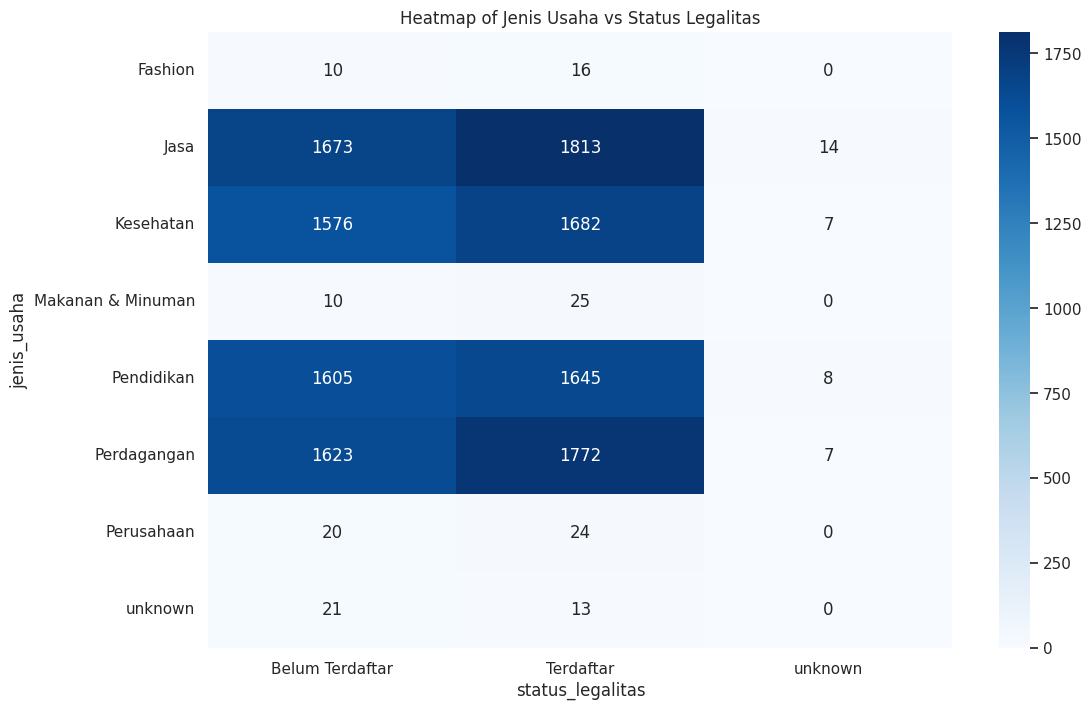

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Reload the data as the previous runs might have modified it
# Ensure you run the previous data loading and cleaning steps before this cell
# data = pd.read_csv("dataset_edit.csv") # Assuming data is already loaded and cleaned

# --- Visualize relationships ---

# Check the data types of the columns
print(data[['jenis_usaha', 'marketplace', 'status_legalitas', 'tahun_berdiri']].dtypes)

# Assuming 'tahun_berdiri' is numerical or can be treated as such for some plots
# Visualize the distribution of 'tahun_berdiri' relative to categorical variables
# Using Boxplots (suitable for numerical vs categorical)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot of tahun_berdiri vs jenis_usaha
sns.boxplot(x='jenis_usaha', y='tahun_berdiri', data=data, ax=axes[0])
axes[0].set_title('Tahun Berdiri vs Jenis Usaha')
axes[0].tick_params(axis='x', rotation=45) # Rotate labels if they overlap

# Boxplot of tahun_berdiri vs marketplace
sns.boxplot(x='marketplace', y='tahun_berdiri', data=data, ax=axes[1])
axes[1].set_title('Tahun Berdiri vs Marketplace')
axes[1].tick_params(axis='x', rotation=45) # Rotate labels if they overlap

# Boxplot of tahun_berdiri vs status_legalitas
sns.boxplot(x='status_legalitas', y='tahun_berdiri', data=data, ax=axes[2])
axes[2].set_title('Tahun Berdiri vs Status Legalitas')
axes[2].tick_params(axis='x', rotation=45) # Rotate labels if they overlap

plt.tight_layout()
plt.show()

# Visualize relationships between categorical variables using count plots or heatmaps

# Count plot for 'jenis_usaha' (Distribution of a single categorical variable)
plt.figure(figsize=(10, 6))
sns.countplot(y='jenis_usaha', data=data, order=data['jenis_usaha'].value_counts().index)
plt.title('Distribution of Jenis Usaha')
plt.show()

# Count plot for 'marketplace'
plt.figure(figsize=(10, 6))
sns.countplot(y='marketplace', data=data, order=data['marketplace'].value_counts().index)
plt.title('Distribution of Marketplace')
plt.show()

# Count plot for 'status_legalitas'
plt.figure(figsize=(8, 6))
sns.countplot(x='status_legalitas', data=data, order=data['status_legalitas'].value_counts().index)
plt.title('Distribution of Status Legalitas')
plt.show()

# To visualize the relationship between two categorical variables, use a count plot with hue
# Example: Relationship between jenis_usaha and marketplace
plt.figure(figsize=(12, 8))
sns.countplot(y='jenis_usaha', hue='marketplace', data=data, order=data['jenis_usaha'].value_counts().index)
plt.title('Jenis Usaha by Marketplace')
plt.show()

# Example: Relationship between status_legalitas and marketplace
plt.figure(figsize=(10, 6))
sns.countplot(x='status_legalitas', hue='marketplace', data=data)
plt.title('Status Legalitas by Marketplace')
plt.show()

# If you want to see the relationship between more than two categorical variables,
# creating contingency tables and using heatmaps might be useful, but can get complex.
# For example, a pivot table to see the count of combinations:
contingency_table = pd.crosstab(data['jenis_usaha'], data['marketplace'])
print("\nContingency Table (Jenis Usaha vs Marketplace):")
print(contingency_table)

# You could visualize this table as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Jenis Usaha vs Marketplace')
plt.show()

# You can repeat similar steps for other pairs of categorical variables.
# For example, Jenis Usaha vs Status Legalitas
contingency_table_jenis_status = pd.crosstab(data['jenis_usaha'], data['status_legalitas'])
print("\nContingency Table (Jenis Usaha vs Status Legalitas):")
print(contingency_table_jenis_status)

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table_jenis_status, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Jenis Usaha vs Status Legalitas')
plt.show()